In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.model_selection import train_test_split
#import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
#jtplot.style()
#jtplot.style(theme='grade3')
jtplot.reset()

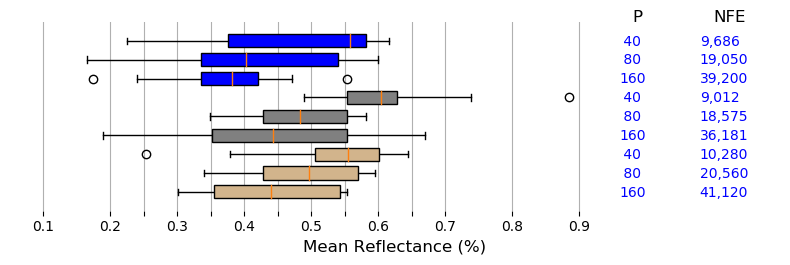

In [160]:
# First a plain DE is run, the variance and the NFE are noted. The rest of the experiments will
# be compared in median fitness, variance and NFE criteria

#parameters
#pop 160, mut, crossp 0.8, 0.7

# best fits
# [0.48785959 0.58261882 0.55317426 0.49193818 0.32472742 0.4255142
#  0.55317426 0.34443803 0.58137137 0.55317426]

#NFE 41,120

# bestind = [ 92.5  19.5  10.  100.   12.   10.   10.   31.   24.5  53.   10.   23.
#   10.   23.   46.   10. ]

#parameters
#pop 80, mut, crossp 0.8, 0.7
# Num func evals:  20,560
# [0.36147214 0.33978596 0.57552733 0.55317426 0.58503677 0.59531799
#  0.46871794 0.41955352 0.52570937 0.45028935]

# examine the role of population size on diff models
a_iii = [
    [0.331,  0.433,  0.553,  0.424,  0.301,  0.553,  0.310,  0.553,  0.448,  0.515],
 [0.36147214, 0.33978596, 0.57552733, 0.55317426, 0.58503677,0.59531799,
  0.46871794, 0.41955352, 0.52570937, 0.45028935],
 [4.0383815 , 0.53207173, 0.56819903, 0.60603444, 0.54221008,
       0.37837564, 0.58783962, 0.49567961, 0.64443869, 0.25271751],
#  [0.581142, 0.55742771, 0.18282079, 0.55317426, 0.42774019,
#  0.42371767, 0.3585741,  0.55317426, 0.4831819 ]    #185747
[0.66916,    0.40150061, 0.36165299, 0.55317426, 0.55317426, 0.3359609,
 0.34893101, 0.48301368, 0.59120689, 0.18936232], #361812
[0.581,  0.562,  0.349,  0.553,  0.428,  0.447,  0.359,  0.553,  0.483], 
#0.581  3.906  0.562  0.349  0.553  0.428  0.447  0.359  0.553  0.483 
    [0.61122395, 0.73893225, 0.627837,   0.55321587, 0.56819903,
 0.50167842, 0.6036122,  0.88532815, 0.48869526],   #90127
#  [0.32800358, 0.58231416, 0.56819903, 0.51519938, 0.55317426,
#        0.57484585, 0.79841205, 0.60123211, 0.57710876, 0.60668055],
#  [0.69479606, 0.57029641, 0.53316599, 0.1638857 , 0.56385887,
#        0.66160492, 0.33624837, 0.54455794, 0.22269105, 0.30009695]
#  [0.40691825, 0.24260909, 0.56016335, 0.56199015, 0.55317426,
#        0.52077106, 0.55321587, 0.34624809, 0.16183826, 0.67778629]
    [0.17462872, 0.3933175,  0.42726047, 0.24030741, 0.32744464, 0.40114667,
 0.36832886, 0.47157674, 0.35616808, 0.55317426], #392005
[0.28502013, 0.49822043, 0.60024699, 0.55317426, 0.32715063, 0.36003328,
 0.55317426, 0.36832886, 0.16448113, 0.43568392], #190509
    [0.59610228, 0.34386473, 0.58503677, 0.56139648, 0.46867085, 0.22425957,
 0.61590249, 0.55321587, 0.56871068, 0.33599194] # 96863
    ] 


#0.581  3.906  0.562  0.349  0.553  0.428  0.447  0.359  0.553  0.483 


plt.figure(figsize=(8,2.75))

box=plt.boxplot(a_iii, whis=1.5, notch=False,  widths=(0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7), patch_artist=True, vert=False,labels=('','','','','','','','',''))
plt.box(None)
plt.xlim([0.05,1.2])
plt.ylim([0,10])
plt.grid(axis='x')
plt.tick_params(left=False)
plt.xlabel('Mean Reflectance (%)', fontsize=12)
plt.xticks([0.1, 0.2, 0.25,0.3, 0.35, 0.4, 0.45, 0.5,0.55, 0.6,0.65,0.7, 0.8, 0.9], labels=['0.1',  '0.2','','0.3','','0.4', '','0.5','','0.6','','0.7', '0.8','0.9']);

colors = ['tan', 'tan', 'tan', 'gray', 'gray', 'gray', 'blue','blue','blue']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

    
plt.text (0.98, 10, "P", color='k',  fontsize=12)
plt.text (0.96, 8.75, " 40", color='b',  fontsize=10)
plt.text (0.96, 7.75, " 80", color='b',  fontsize=10)
plt.text (0.96, 6.75, "160", color='b',  fontsize=10)
plt.text (0.96, 5.75, " 40", color='b',  fontsize=10)
plt.text (0.96, 4.75, " 80", color='b',  fontsize=10)
plt.text (0.96, 3.75, "160", color='b',  fontsize=10)
plt.text (0.96, 2.75, " 40", color='b',  fontsize=10)
plt.text (0.96, 1.75, " 80", color='b',  fontsize=10)
plt.text (0.96, 0.75, "160", color='b',  fontsize=10)


plt.text (1.10, 10, "NFE", color='k',  fontsize=12)
plt.text (1.08, 8.75, "9,686", color='b',   fontsize=10)
plt.text (1.08, 7.75, "19,050", color='b',  fontsize=10)
plt.text (1.08, 6.75, "39,200", color='b',  fontsize=10)
plt.text (1.08, 5.75, "9,012", color='b',   fontsize=10)
plt.text (1.08, 4.75, "18,575", color='b',  fontsize=10)
plt.text (1.08, 3.75, "36,181", color='b',  fontsize=10)
plt.text (1.08, 2.75, "10,280", color='b',  fontsize=10)
plt.text (1.08, 1.75, "20,560", color='b',  fontsize=10)
plt.text (1.08, 0.75, "41,120", color='b',  fontsize=10)
    
    
    
    
    
    
    
plt.savefig('onlinetr.pdf', dpi=1600, pad_inches=0.0, bbox_inches='tight')
plt.tight_layout()
plt.show()

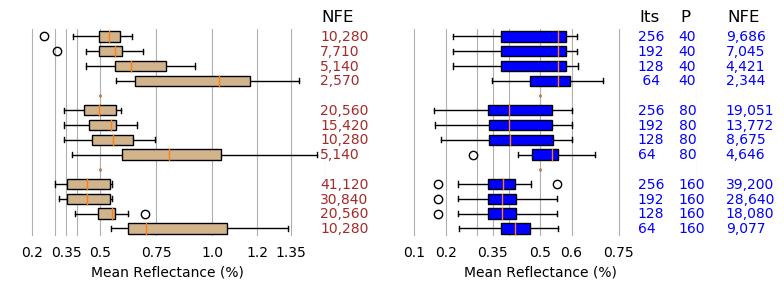

In [203]:
#plain de fitness at different iterations

a_iii = [
    [0.748, 1.096, 0.617, 1.908, 0.969, 0.642, 0.662, 0.617, 1.335, 0.549],
    [0.409, 0.571, 0.553, 0.623, 0.486, 0.553, 0.388, 0.553, 0.702, 0.515],  
    [0.331, 0.434, 0.553, 0.428, 0.326, 0.553, 0.318, 0.553, 0.449, 0.515], 
    [0.331,  0.433,  0.553,  0.424,  0.301,  0.553,  0.310,  0.553,  0.448,  0.515],
    [0.5],
    [0.607,  0.747,  1.041,  0.598,  1.288,  1.466,  0.375,  1.035,  0.594,  0.865],  
    [0.553,  0.556,  0.702,  0.598,  0.745,  0.435,  0.340,  0.664,  0.560,  0.357],  
    [0.553,  0.55,  0.502,  0.578,  0.645,  0.435,  0.340,  0.664,  0.560,  0.357],  
    [0.36147214, 0.33978596, 0.57552733, 0.55317426, 0.58503677,0.59531799,
  0.46871794, 0.41955352, 0.52570937, 0.45028935],
    [0.5], 
    [1.385,  0.571,  0.606,  1.168,  1.147,  1.202,  0.672,  1.031,  0.658] , #59
[0.923,  0.568,  0.606,  0.640,  0.657,  0.821,  0.497,  0.794,  0.439],  #128
  [0.578,  0.568,  0.606,  0.557,  0.438,  0.597,  0.496,  0.690,  0.309],
     [0.53207173, 0.56819903, 0.60603444, 0.54221008,
       0.37837564, 0.58783962, 0.49567961, 0.64443869, 0.25271751]
    ] 


#0.581  3.906  0.562  0.349  0.553  0.428  0.447  0.359  0.553  0.483 


plt.figure(figsize=(8,3))

plt.subplot(121)

box=plt.boxplot(a_iii, whis=1.5, notch=False,  widths=(0.7,0.7,0.7,0.7,0.1,0.7,0.7,0.7,0.7,0.1,0.7,0.7,0.7,0.7), patch_artist=True, vert=False,labels=('','','','','','','','','','','','','',''))
plt.box(None)
plt.xlim([0.1,0.5])
plt.grid(axis='x')
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.xlabel('Mean Reflectance (%)')
plt.xticks([ 0.2, 0.3, 0.35, 0.4, 0.5, 0.75,1.0,1.2,1.35, 1.5], labels=[  '0.2','','0.35','', '0.5','0.75', '1.0','1.2','1.35','']);
plt.tight_layout()

colors = ['tan', 'tan', 'tan', 'tan', 'b','tan', 'tan', 'tan','tan', 'b','tan', 'tan', 'tan','tan' ]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.text (1.485, 15, "NFE", color='k',  fontsize=12)
plt.text (1.48,  0.7, "10,280", color='brown',  fontsize=10)
plt.text (1.48, 1.7, "20,560", color='brown',  fontsize=10)
plt.text (1.48,  2.7, "30,840", color='brown',  fontsize=10)
plt.text (1.48,  3.7, "41,120", color='brown',  fontsize=10)
plt.text (1.48,  5.7, "5,140", color='brown',  fontsize=10)
plt.text (1.48,  6.7, "10,280", color='brown',  fontsize=10)
plt.text (1.48,  7.7, "15,420", color='brown',  fontsize=10)
plt.text (1.48,  8.7, "20,560",  color='brown',   fontsize=10)
plt.text (1.48,  13.7, "10,280", color='brown',  fontsize=10)
plt.text (1.48,  12.7, "7,710", color='brown',  fontsize=10)
plt.text (1.48,  11.7, "5,140", color='brown',  fontsize=10)
plt.text (1.48,  10.7, "2,570",  color='brown',   fontsize=10)



a_iii = [
[0.278, 0.395, 0.427, 0.242, 0.411, 0.474, 0.368, 0.485, 0.445, 0.556],
[0.176, 0.393, 0.427, 0.240, 0.327, 0.419, 0.368, 0.472, 0.359, 0.553] , 
[0.175, 0.393, 0.427, 0.240, 0.327, 0.409, 0.368, 0.472, 0.356, 0.553],
[0.17462872,0.3933175, 0.42726047,0.24030741,0.32744464,0.4011466,
 0.36832886,0.47157674,0.35616808,0.55317426],
    [0.5],
[0.287, 0.556, 0.675, 0.557, 0.633, 0.467, 0.553, 0.429, 0.521, 0.500],
[0.285, 0.503, 0.600, 0.553, 0.329, 0.376, 0.553, 0.368, 0.186, 0.436],
[0.285, 0.498, 0.600, 0.553, 0.327, 0.367, 0.553, 0.368, 0.165, 0.436],
[0.28502013,0.49822043,0.60024699,0.55317426,0.32715063,0.3600332,
 0.55317426,0.36832886,0.16448113,0.43568392],
    [0.5],
[0.597, 0.361, 0.585, 0.561, 0.512, 0.455, 0.700, 0.555, 0.598, 0.348],
[0.596, 0.345, 0.585, 0.561, 0.469, 0.224, 0.620, 0.553, 0.569, 0.336],
[0.596, 0.344, 0.585, 0.561, 0.469, 0.224, 0.616, 0.553, 0.569, 0.336],
[0.59610228,0.34386473, 0.58503677,0.56139648,0.46867085,0.2242595,
 0.61590249,0.55321587,0.56871068,0.33599194]]



plt.subplot(122)

box=plt.boxplot(a_iii, whis=1.5, notch=False,  widths=(0.7,0.7,0.7,0.7,0.1,0.7,0.7,0.7,0.7,0.1,0.7,0.7,0.7,0.7), patch_artist=True, vert=False,labels=('','','','','','','','','','','','','',''))
plt.box(None)
plt.xlim([0,0.8])
plt.grid(axis='x')
plt.tick_params(bottom=False)
plt.tick_params(left=False)
plt.xlabel('Mean Reflectance (%)')
plt.xticks([0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.75, 1.0], labels=['0.1',  '0.2','','0.35','', '0.5', '0.6','0.75', '']);

colors = ['blue','b','b','b', 'k', 'blue','b','b','b','k','blue','b','b','b']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


plt.text (0.815, 15, "Its", color='k',  fontsize=12)
plt.text (0.81, 13.7, "256", color='b',  fontsize=10)
plt.text (0.81, 12.7, "192", color='b',  fontsize=10)
plt.text (0.81, 11.7, "128", color='b',  fontsize=10)
plt.text (0.81, 10.7, " 64", color='b',  fontsize=10)
plt.text (0.81,  8.7, "256", color='b',  fontsize=10)
plt.text (0.81,  7.7, "192", color='b',  fontsize=10)
plt.text (0.81,  6.7, "128", color='b',  fontsize=10)
plt.text (0.81,  5.7, "64",  color='b',   fontsize=10)
plt.text (0.81,  3.7, "256", color='b',  fontsize=10)
plt.text (0.81,  2.7, "192", color='b',  fontsize=10)
plt.text (0.81,  1.7, "128", color='b',  fontsize=10)
plt.text (0.81,  0.7, "64",  color='b',   fontsize=10)

plt.text (0.945, 15, "P", color='k',  fontsize=12)
plt.text (0.94, 13.7, "40", color='b',  fontsize=10)
plt.text (0.94, 12.7, "40", color='b',  fontsize=10)
plt.text (0.94, 11.7, "40", color='b',  fontsize=10)
plt.text (0.94, 10.7, "40", color='b',  fontsize=10)
plt.text (0.94,  8.7, "80", color='b',  fontsize=10)
plt.text (0.94,  7.7, "80", color='b',  fontsize=10)
plt.text (0.94,  6.7, "80", color='b',  fontsize=10)
plt.text (0.94,  5.7, "80", color='b',   fontsize=10)
plt.text (0.94,  3.7, "160", color='b',  fontsize=10)
plt.text (0.94,  2.7, "160", color='b',  fontsize=10)
plt.text (0.94,  1.7, "160", color='b',  fontsize=10)
plt.text (0.94,  0.7, "160", color='b',   fontsize=10)

plt.text (1.095, 15, "NFE", color='k',  fontsize=12)
plt.text (1.09,  0.7, "9,077", color='b',  fontsize=10)
plt.text (1.09, 1.7, "18,080",  color='b',  fontsize=10)
plt.text (1.09,  2.7, "28,640", color='b',  fontsize=10)
plt.text (1.09,  3.7, "39,200", color='b',  fontsize=10)
plt.text (1.09,  5.7, "4,646",  color='b',  fontsize=10)
plt.text (1.09,  6.7, "8,675", color='b',  fontsize=10)
plt.text (1.09,  7.7, "13,772", color='b',  fontsize=10)
plt.text (1.09,  8.7, "19,051", color='b',   fontsize=10)
plt.text (1.09,  13.7, "9,686",color='b',  fontsize=10)
plt.text (1.09,  12.7, "7,045", color='b',  fontsize=10)
plt.text (1.09,  11.7, "4,421", color='b',  fontsize=10)
plt.text (1.09,  10.7, "2,344", color='b',   fontsize=10)

# plt.text (1.10, 10, "NFE", color='k',  fontsize=12)
# plt.text (1.08, 8.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 7.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 6.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 5.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 4.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 3.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 2.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 1.75, "9,000", color='b',  fontsize=12)
# plt.text (1.08, 0.75, "9,000", color='b',  fontsize=12)    
    
    
    
plt.tight_layout()
plt.savefig('iterdep.pdf', dpi=1600, bbox_inches="tight", pad_inches=0)
plt.show()


In [236]:
fecnt=np.array([80]*32 + [62, 48, 42, 50, 50, 47, 44, 62, 52, 40, 39, 29, 34, 32, 31, 26, 30, 31, 24, 25,
27, 80, 80, 27, 25, 26, 80, 22, 80, 23, 80, 35, 49, 41, 49, 24, 18, 17,
24, 80, 35, 33, 34, 35, 44, 49, 45, 80, 47, 80, 39, 80, 54, 51, 80, 44,
45, 43, 80, 80, 80, 80, 34, 80, 35, 80, 80, 80, 80, 80, 33, 80, 80, 80,
80, 35, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,
80, 80, 80, 80])

fitprog = np.array([38.285,  30.771,  30.771,  27.331,  19.218,  14.717,  13.449,  10.433,  10.433,
 10.433,  7.986,  4.444,  3.912,  3.912,  3.912,  3.912,  3.912,  3.912,  3.912,
 2.969,  2.969,  2.969,  1.933,  1.933,  1.933,  1.933,  1.933,  1.933,  1.933,
 1.933,  1.911,  1.911,  1.277,   1.241,   1.014,   0.747,   0.747,   0.747,
 0.664,   0.664,   0.664,   0.582,   0.559,   0.559,   0.559,   0.510,   0.510,
 0.420,   0.420,   0.420,   0.420,   0.420,   0.420,   0.413,   0.413,   0.413,
 0.396,   0.388,   0.372,   0.372,   0.362,   0.362,   0.349,   0.349,   0.349,
 0.345,   0.339,   0.339,   0.339,   0.339,   0.339,   0.334,   0.334,   0.334,
 0.334,   0.333,   0.329,   0.329,   0.325,   0.324,   0.324,   0.324,   0.324,
 0.324,   0.324,   0.324,   0.324,   0.323,   0.323,   0.323,   0.323,   0.323,
 0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,
 0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,
 0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,
 0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323,   0.323])

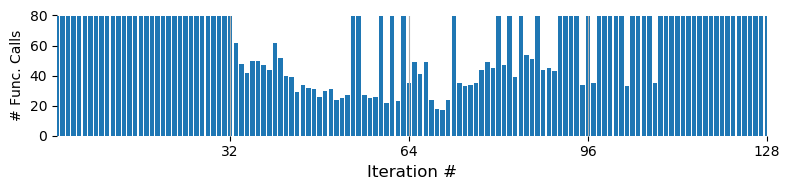

In [227]:
plt.figure(figsize=(8,2))
plt.bar(range(1,129), fecnt)
plt.ylim([0,80])
plt.xlim([1,128])
plt.box(None)

plt.grid(axis='x')
#plt.tick_params(bottom=False)
#plt.tick_params(left=False)
plt.xlabel('Iteration #', fontsize=12)
plt.ylabel('# Func. Calls')
plt.xticks([ 32, 64, 96, 128], labels=[  '32','64','96','128']);
plt.tight_layout()
plt.show()

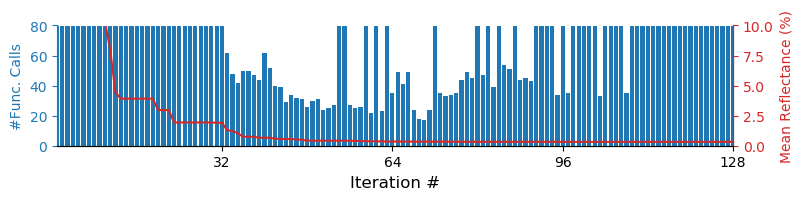

In [268]:
its = range(1,129)


fig, ax1 = plt.subplots(figsize=(8,2))

ax1.set_xlabel('Iteration #', fontsize=12)
color = 'tab:blue'
ax1.set_ylabel('#Func. Calls', color=color)  # we already handled the x-label with ax1
ax1.bar(its, fecnt, color=color, alpha=1.0)
ax1.tick_params(axis='y', labelcolor=color, colors=color)
ax1.set_ylim([0,80])
ax1.spines['left'].set_color(color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Mean Reflectance (%)', color=color)
ax2.plot(its, fitprog, color=color)
ax2.tick_params(axis='y', labelcolor=color, colors=color)
ax2.set_xticks([ 32, 64, 96, 128]) #, labels=[  '32','64','96','128']);
ax2.set_xlim([1,128])
ax2.set_ylim([0,10])
ax2.spines['right'].set_color(color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.savefig('fitprogs.pdf', dpi=1600, bbox_inches="tight", pad_inches=0)
plt.show()